# Problem Definition

The Forest Fires dataset from the UCI repository provides data to predict the burned area of forest fires in the northeast region of Portugal, using meteorological and spatial attributes. The problem is to build a predictive model that can estimate the area affected by a fire (in hectares) based on environmental factors such as temperature, wind, humidity, and rain, as well as spatial variables like the day of the week and month. This problem is crucial for improving forest fire management and prevention strategies.

This is a supervised regression problem, with the added challenge of a highly skewed target variable, where most values are close to 0.0. Even before attempting a solution, it’s clear this will be a difficult problem. Data Science and Machine Learning rely on the assumption that all factors influencing the target variable are present in the dataset. However, in real-world scenarios, this is rarely the case. For instance, this dataset lacks important factors such as human activity and solar radiation, both of which likely impact forest fires. Combined with the skewed target distribution and the small dataset (less than 1k rows), these limitations make the problem particularly challenging to address effectively.

# Dataset Setup

In the cells bellow, the dataset was imported and some information was provided: the description of each variable and if each variable has missing values (none has).

In [9]:
%pip install ucimlrepo ydata_profiling ipywidgets;

   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   ----- --------------------------------- 20.5/139.8 kB 640.0 kB/s eta 0:00:01
   ----------------- ---------------------- 61.4/139.8 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 139.8/139.8 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   ---------------------------------------- 214.4/214.4 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------ --------------------------- 0.7/2.3 MB 23.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.7/2.3 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 21.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
forest_fires = fetch_ucirepo(id=162)

X = forest_fires.data.features
y = forest_fires.data.targets
df = pd.concat([X, y], axis=1)
print(forest_fires.metadata)

print(forest_fires.variables)

{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

Even with the description, it is important to clarify each variable in the dataset.
* x-axis spatial coordinate:

    *  Description: Spatial coordinate representing the location of the fire within the Montesinho park on the x-axis.
    * Units: None (unitless, likely a categorical or ordinal value representing a spatial grid).
    * Data Type: Integer.
* y-axis spatial coordinate:

    * Description: Spatial coordinate representing the location of the fire within the Montesinho park on the y-axis.
    * Units: None (unitless, like the x-axis, representing a spatial grid).
    * Data Type: Integer.

* Month

    * Description: Categorical variable indicating the month of the fire occurrence, from 'jan' (January) to 'dec' (December).
    * Units: None.
    * Data Type: String (Categorical).

* Day

    * Description: Categorical variable indicating the day of the week the fire occurred, from 'mon' (Monday) to 'sun' (Sunday).
    * Units: None.
    * Data Type: String (Categorical).

* FFMC (Fine Fuel Moisture Code)

    * Description: Part of the Canadian Fire Weather Index (FWI) system, FFMC represents the moisture content of surface litter and other fine fuels, with lower values indicating wetter conditions and higher values indicating drier conditions (range: 18.7 to 96.20).
    * Units: None (index).
    * Data Type: Float.

* DMC (Duff Moisture Code)

    * Description: Another index from the FWI system, DMC represents the moisture content of loosely compacted organic layers of moderate depth. Higher values correspond to drier conditions (range: 1.1 to 291.3).
    * Units: None (index).
    * Data Type: Float.

* DC (Drought Code)

    * Description: This index from the FWI system indicates the long-term moisture content in deeper, compact organic layers. High values mean more severe drought conditions (range: 7.9 to 860.6).
    * Units: None (index).
    * Data Type: Float.

* ISI (Initial Spread Index)

    * Description: Part of the FWI system, ISI measures the expected rate of fire spread. It depends on wind speed and the fine fuel moisture content (range: 0.0 to 56.10).
    * Units: None (index).
    * Data Type: Float.

* Temperature

    * Description: The average temperature in Celsius during the day of the fire (range: 2.2°C to 33.3°C).
    * Units: Celsius degrees.
    * Data Type: Float.

* Relative Humidity

    * Description: The percentage of moisture in the air during the day of the fire (range: 15% to 100%).
    * Units: Percentage (%).
    * Data Type: Float.

* Wind Speed

    * Description: Average wind speed in kilometers per hour during the day of the fire (range: 0.40 km/h to 9.40 km/h).
    * Units: Kilometers per hour (km/h).
    * Data Type: Float.

* Rain

    * Description: Total amount of rainfall in millimeters per square meter on the day of the fire (range: 0.0 mm to 6.4 mm).
    * Units: Millimeters per square meter (mm/m²).
    * Data Type: Float.

* Burned Area (Target)

    * Description: The total area burned by the fire, measured in hectares (range: 0.00 to 1090.84 ha).
    * Units: Hectares (ha).
    * Data Type: Float.


In [4]:
df.shape

(517, 13)

In [5]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Exploratory Data Analysis

The basic Exploratory Data Analysis (EDA) can be performed automatically using a library called ydata-profiling. After reviewing the initial results, we will conduct further in-depth exploration based on the insights gained from the automated EDA.

In [2]:
from ydata_profiling import ProfileReport
eda = ProfileReport(df)

The eda will be saved on a HTML file, but if you are on colab, you can use the commented code to show it no the notebook it self.

In [4]:
eda.to_file("eda.html")
# eda.to_notebook_iframe() # Use this if in colab

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

There are several key observations from the EDA:

* Correlation between FWI system indexes: The indexes in the Fire Weather Index (FWI) system are highly correlated, which is expected since, although they are different measures, they all aim to assess fire risk.

* Rain occurrence: Only 1.5% of the data shows any rainfall, with 98.5% being zeros. During model training, it might be worth experimenting with removing this column due to the lack of variability.

* Month distribution: August and September are significantly overrepresented in the dataset.

* Burned Area: this is the target variable and it is very skewed to 0. To help in this reguard, this variable will be transformed to the log scale.

The other columns exhibit typical distributions and don't provide much additional insight. Based on this analysis, we can create a heatmap using the X and Y coordinates to visualize the spatial distribution of forest fires in the area.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

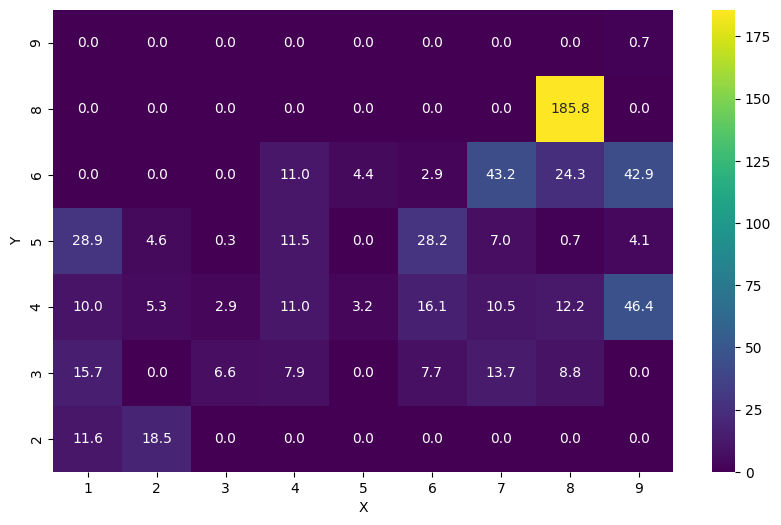

In [9]:
heatmap_data = df.pivot_table(values='area', index='Y', columns='X', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f")
plt.gca().invert_yaxis()

plt.show()


This provides a valuable overview of the area. There are certain locations with very low occurrences of fires, while others exhibit a higher frequency. However, overall, the values remain relatively low. Notably, the coordinates (8, 8) indicate a larger burned area, which we should monitor as an outlier in case any issues arise during regression analysis.

# Pre Processing

The preprocessing steps will be straightforward. Numerical values will be scaled using the StandardScaler (this does not include the X and Y coordinates, due to they being sequential and ordinal), which normalizes the data to have a mean of 0 and a standard deviation of 1. Categorical variables will be transformed using one-hot encoding. Additionally, the day column will be removed, as it is intuitively clear that the day of the week has no significant impact on fire probability.
The target variable will be transformed to the log scale due to it being very skewed to 0.


In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
import numpy as np

In [37]:
df.drop(columns=["day"], inplace=True)
numerical_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_columns = ['month']
target_column = 'area'

In [38]:
std_scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
log_transformer = FunctionTransformer(np.log1p, validate=True)

encoded = one_hot_encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
df = pd.concat([encoded_df, df], axis=1)
df = df.drop(categorical_columns, axis=1)
df[numerical_columns] = std_scaler.fit_transform(df[numerical_columns])
df[target_column] = log_transformer.fit_transform(df[[target_column]])

Afther the transformations, we can take a look into the dataset transformed

In [39]:
df.head()

,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,...,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.0


We can also see the effect that using the log transformation on the target variable had on the distribution. And it is possible to see that they got to the same scale and the meaning of the column was not lost

<Axes: xlabel='area', ylabel='Count'>

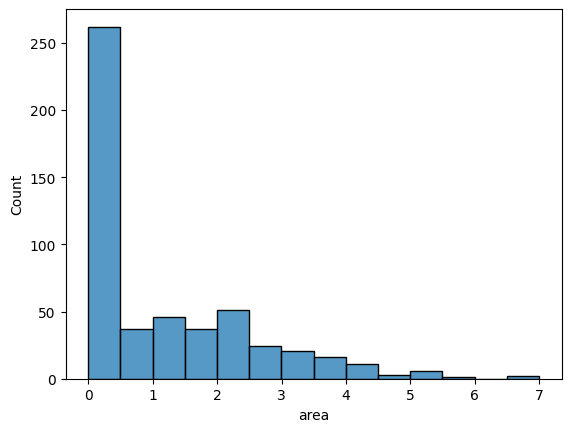

In [40]:
sns.histplot(df[target_column])